In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joshuailangovan","key":"eb58034bdaf78430e302841eaf0f1f19"}'}

In [3]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

Dataset URL: https://www.kaggle.com/datasets/tanlikesmath/diabetic-retinopathy-resized
License(s): unknown
100% 7.25G/7.25G [01:39<00:00, 163MB/s]
100% 7.25G/7.25G [01:39<00:00, 78.6MB/s]


In [5]:
!unzip diabetic-retinopathy-resized.zip

Streaming output truncated to the last 5000 lines.
  inflating: resized_train_cropped/resized_train_cropped/44260_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44261_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44262_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44263_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44264_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_left.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44265_right.jpeg  
  inflating: resized_train_cropped/resized_train_cropped/44267_left.jpeg  
  inflating: resized_train_cropped/resized_

In [6]:
!ls -l resized_train_cropped

total 1184
drwxr-xr-x 2 root root 1208320 Mar 18 15:47 resized_train_cropped


In [7]:
import os

# List all files and directories in the current working directory
print("Files and directories in the current path:")
!ls -l

# Optionally, change to a specific directory if needed (e.g., /content/)
# os.chdir('/content/')
# !ls -l

Files and directories in the current path:
total 7604828
-rw-r--r-- 1 root root 7785957896 Oct 19  2019 diabetic-retinopathy-resized.zip
drwxr-xr-x 3 root root       4096 Mar 18 15:45 resized_train
drwxr-xr-x 3 root root       4096 Mar 18 15:46 resized_train_cropped
drwxr-xr-x 1 root root       4096 Mar 14 13:32 sample_data
-rw-r--r-- 1 root root     899292 Oct 19  2019 trainLabels_cropped.csv
-rw-r--r-- 1 root root     465317 Oct 19  2019 trainLabels.csv


In [8]:
# Check contents of resized_train directory
print("\nContents of resized_train directory:")
!ls -l resized_train | head -n 5  # Display first 5 entries as a sample

# Check contents of resized_train_cropped directory
print("\nContents of resized_train_cropped directory:")
!ls -l resized_train_cropped | head -n 5  # Display first 5 entries as a sample


Contents of resized_train directory:
total 1180
drwxr-xr-x 2 root root 1208320 Mar 18 15:46 resized_train

Contents of resized_train_cropped directory:
total 1184
drwxr-xr-x 2 root root 1208320 Mar 18 15:47 resized_train_cropped


In [9]:
import pandas as pd

# Read and display the first few rows of trainLabels.csv
print("\nContents of trainLabels.csv:")
train_labels = pd.read_csv('trainLabels.csv')
print(train_labels.head())

# Read and display the first few rows of trainLabels_cropped.csv
print("\nContents of trainLabels_cropped.csv:")
train_labels_cropped = pd.read_csv('trainLabels_cropped.csv')
print(train_labels_cropped.head())


Contents of trainLabels.csv:
      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

Contents of trainLabels_cropped.csv:
   Unnamed: 0.1  Unnamed: 0     image  level
0             0           0   10_left      0
1             1           1  10_right      0
2             2           2   13_left      0
3             3           3  13_right      0
4             4           4   15_left      1


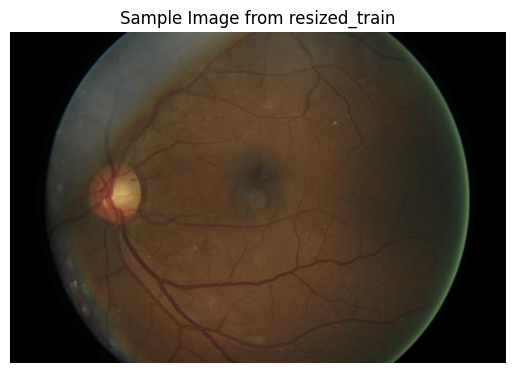

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Display a sample image from resized_train
sample_image = '/content/resized_train/resized_train/1002_right.jpeg'  # Replace with an actual filename from the directory
img = mpimg.imread(sample_image)
plt.imshow(img)
plt.axis('off')
plt.title('Sample Image from resized_train')
plt.show()

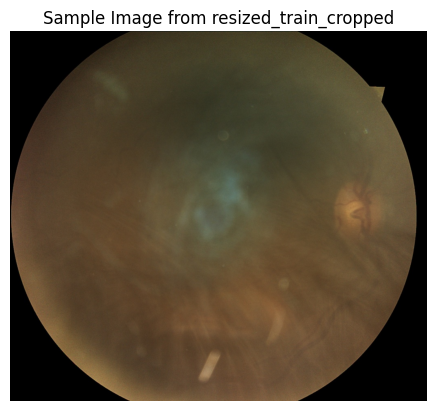

In [11]:
# Display a sample image from resized_train_cropped
sample_image_cropped = '/content/resized_train_cropped/resized_train_cropped/10043_right.jpeg'  # Replace with an actual filename
img_cropped = mpimg.imread(sample_image_cropped)
plt.imshow(img_cropped)
plt.axis('off')
plt.title('Sample Image from resized_train_cropped')
plt.show()

In [12]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Verify the working directory
print("Current directory contents:")
!ls -l

Current directory contents:
total 7604828
-rw-r--r-- 1 root root 7785957896 Oct 19  2019 diabetic-retinopathy-resized.zip
drwxr-xr-x 3 root root       4096 Mar 18 15:45 resized_train
drwxr-xr-x 3 root root       4096 Mar 18 15:46 resized_train_cropped
drwxr-xr-x 1 root root       4096 Mar 14 13:32 sample_data
-rw-r--r-- 1 root root     899292 Oct 19  2019 trainLabels_cropped.csv
-rw-r--r-- 1 root root     465317 Oct 19  2019 trainLabels.csv


In [13]:
# Load labels
labels_df = pd.read_csv('trainLabels_cropped.csv')
print("Sample of trainLabels_cropped.csv:")
print(labels_df.head())

# Check unique labels (assuming a 'level' column for severity 0-4)
print("\nUnique labels:", labels_df['level'].unique())

# For binary classification, map labels: 0 = No DR, 1-4 = DR
labels_df['binary_label'] = labels_df['level'].apply(lambda x: 0 if x == 0 else 1)
print("\nBinary labels sample:")
print(labels_df[['image', 'level', 'binary_label']].head())

Sample of trainLabels_cropped.csv:
   Unnamed: 0.1  Unnamed: 0     image  level
0             0           0   10_left      0
1             1           1  10_right      0
2             2           2   13_left      0
3             3           3  13_right      0
4             4           4   15_left      1

Unique labels: [0 1 2 4 3]

Binary labels sample:
      image  level  binary_label
0   10_left      0             0
1  10_right      0             0
2   13_left      0             0
3  13_right      0             0
4   15_left      1             1


In [14]:
import pandas as pd
import os
import shutil

# Load the labels
labels_df = pd.read_csv('trainLabels_cropped.csv')

# Add binary labels
labels_df['binary_label'] = labels_df['level'].apply(lambda x: 0 if x == 0 else 1)

# Check class distribution
print("Class distribution in full dataset:")
print(labels_df['binary_label'].value_counts())

# Select a balanced subset (e.g., 2500 No DR, 2500 DR)
no_dr = labels_df[labels_df['binary_label'] == 0].sample(n=2500, random_state=42)
dr = labels_df[labels_df['binary_label'] == 1].sample(n=2500, random_state=42)

# Combine into a subset
subset_df = pd.concat([no_dr, dr]).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nSubset class distribution:")
print(subset_df['binary_label'].value_counts())

# Create a new directory for the subset
subset_dir = 'subset_train_cropped'
if not os.path.exists(subset_dir):
    os.makedirs(subset_dir)

# Copy the selected images to the new directory
for img_name in subset_df['image']:
    src_path = os.path.join('resized_train_cropped', f"{img_name}.jpeg")
    dst_path = os.path.join(subset_dir, f"{img_name}.jpeg")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)

# Verify the number of images copied
print(f"\nNumber of images in subset directory: {len(os.listdir(subset_dir))}")

Class distribution in full dataset:
binary_label
0    25802
1     9306
Name: count, dtype: int64

Subset class distribution:
binary_label
0    2500
1    2500
Name: count, dtype: int64

Number of images in subset directory: 0


In [15]:
# Check contents of resized_train/resized_train/
!ls -l resized_train/resized_train/

# Check contents of resized_train_cropped/resized_train_cropped/
!ls -l resized_train_cropped/resized_train_cropped/

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root 203822 Oct 19  2019 44257_right.jpeg
-rw-r--r-- 1 root root 164953 Oct 19  2019 44260_left.jpeg
-rw-r--r-- 1 root root 176389 Oct 19  2019 44260_right.jpeg
-rw-r--r-- 1 root root 175911 Oct 19  2019 44261_left.jpeg
-rw-r--r-- 1 root root 164819 Oct 19  2019 44261_right.jpeg
-rw-r--r-- 1 root root 221145 Oct 19  2019 44262_left.jpeg
-rw-r--r-- 1 root root 218742 Oct 19  2019 44262_right.jpeg
-rw-r--r-- 1 root root 142157 Oct 19  2019 44263_left.jpeg
-rw-r--r-- 1 root root 138661 Oct 19  2019 44263_right.jpeg
-rw-r--r-- 1 root root 187710 Oct 19  2019 44264_left.jpeg
-rw-r--r-- 1 root root 189816 Oct 19  2019 44264_right.jpeg
-rw-r--r-- 1 root root 172050 Oct 19  2019 44265_left.jpeg
-rw-r--r-- 1 root root 173813 Oct 19  2019 44265_right.jpeg
-rw-r--r-- 1 root root 153384 Oct 19  2019 44267_left.jpeg
-rw-r--r-- 1 root root 160154 Oct 19  2019 44267_right.jpeg
-rw-r--r-- 1 root root 171159 Oct 19  2019 44268_left.jp

In [16]:
import pandas as pd
import os
import shutil

# Load the labels
labels_df = pd.read_csv('trainLabels_cropped.csv')

# Add binary labels: 0 for No DR (level 0), 1 for DR (level 1-4)
labels_df['binary_label'] = labels_df['level'].apply(lambda x: 0 if x == 0 else 1)

# Check class distribution in full dataset
print("Class distribution in full dataset:")
print(labels_df['binary_label'].value_counts())

# Select a balanced subset: 500 No DR (0), 500 DR (1)
no_dr = labels_df[labels_df['binary_label'] == 0].sample(n=500, random_state=42)
dr = labels_df[labels_df['binary_label'] == 1].sample(n=500, random_state=42)

# Combine into a subset
subset_df = pd.concat([no_dr, dr]).sample(frac=1, random_state=42).reset_index(drop=True)
print("\nSubset class distribution:")
print(subset_df['binary_label'].value_counts())

# Create a new directory for the subset
subset_dir = 'subset_train_cropped'
if not os.path.exists(subset_dir):
    os.makedirs(subset_dir)

# Copy the selected images to the new directory
for img_name in subset_df['image']:
    src_path = os.path.join('resized_train_cropped/resized_train_cropped', f"{img_name}.jpeg")
    dst_path = os.path.join(subset_dir, f"{img_name}.jpeg")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Warning: {src_path} not found")

# Verify the number of images copied
print(f"\nNumber of images in subset directory: {len(os.listdir(subset_dir))}")

Class distribution in full dataset:
binary_label
0    25802
1     9306
Name: count, dtype: int64

Subset class distribution:
binary_label
1    500
0    500
Name: count, dtype: int64

Number of images in subset directory: 1000


In [17]:
subset_df['binary_label'] = subset_df['binary_label'].astype(str)

In [18]:
subset_df['image'] = subset_df['image'] + '.jpeg'

In [19]:
# Load the labels (adjust path as needed)
labels_df = pd.read_csv('trainLabels_cropped.csv')

# Add binary labels: 0 for No DR (level 0), 1 for DR (level 1-4)
labels_df['binary_label'] = labels_df['level'].apply(lambda x: 0 if x == 0 else 1)

# Create a balanced subset
no_dr = labels_df[labels_df['binary_label'] == 0].sample(n=500, random_state=42)
dr = labels_df[labels_df['binary_label'] == 1].sample(n=500, random_state=42)
subset_df = pd.concat([no_dr, dr]).sample(frac=1, random_state=42).reset_index(drop=True)

# Create subset directory
subset_dir = 'subset_train_cropped'
if not os.path.exists(subset_dir):
    os.makedirs(subset_dir)

# Copy images to subset directory
for img_name in subset_df['image']:
    src_path = os.path.join('resized_train_cropped/resized_train_cropped', f"{img_name}.jpeg")
    dst_path = os.path.join(subset_dir, f"{img_name}.jpeg")
    if os.path.exists(src_path):
        shutil.copy(src_path, dst_path)
    else:
        print(f"Warning: {src_path} not found")

# Define image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Modify the DataFrame
subset_df['image'] = subset_df['image'] + '.jpeg'
subset_df['binary_label'] = subset_df['binary_label'].astype(str)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=subset_df,
    x_col='image',
    y_col='binary_label',
    directory=subset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=subset_df,
    x_col='image',
    y_col='binary_label',
    directory=subset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Print class indices to confirm
print("Train generator class indices:", train_generator.class_indices)
print("Validation generator class indices:", validation_generator.class_indices)

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Train generator class indices: {'0': 0, '1': 1}
Validation generator class indices: {'0': 0, '1': 1}


In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load pre-trained ResNet50 (without the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to prevent them from being updated during training
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pool the feature maps
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # 800 / 32 = 25 steps
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # 200 / 32 = 6 steps
    epochs=20
)

# Save the trained model as a .keras file
model.save('trained_model.keras')


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 725ms/step - accuracy: 0.4437 - loss: 0.7203 - val_accuracy: 0.5781 - val_loss: 0.6929
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 723ms/step - accuracy: 0.4906 - loss: 0.6922 - val_accuracy: 0.4740 - val_loss: 0.6953
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 670ms/step - accuracy: 0.5338 - loss: 0.6956 - val_accuracy: 0.5052 - val_loss: 0.6932
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 715ms/step - accuracy: 0.5056 - loss: 0.6904 - val_accuracy: 0.4792 - val_loss: 0.6935
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 668ms/step - accuracy: 0.4864 - loss: 0.6989 - val_accuracy: 0.4740 - val_loss: 0.6950
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 668ms/step - accuracy: 0.5115 - loss: 0.6954 - val_accuracy: 0.4635 - val_loss: 0.6942
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 691ms/step - accuracy: 0.5615 - loss: 0.6914 - val_accuracy: 0.4844 - val_loss: 0.6938
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - accuracy: 0.5040 - loss: 0.6962 - val_accu